In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Environment Setup

In [ ]:
! pip install -q kaggle

#from google.colab import files
#_ = files.upload()

! mkdir -p ~/.kaggle
! cp "/content/gdrive/Shareddrives/business progetto/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
import pandas as pd
from pathlib import Path
import ast
from tqdm.auto import tqdm

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import packages for data visualization
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx

import itertools
import pydot

!apt-get install graphviz graphviz-dev > null
!pip install pygraphviz > null


!pip install nltk > null
import nltk
!pip install pattern > null
nltk.download('omw-1.4')
from pattern.text.en import singularize
import ast

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
! kaggle datasets download -d andrewmvd/steam-reviews --unzip

 97% 668M/685M [00:06<00:00, 183MB/s]
100% 685M/685M [00:06<00:00, 108MB/s]


##  Data Manipulation

In [ ]:
games_genres_df = pd.read_csv("/content/gdrive/Shareddrives/business progetto/dumpone0.csv")

fixed_genres = []

for index, row in games_genres_df.iterrows():
  genre_list = ast.literal_eval(row['genres'])
  aux1 = []
  
  for genre in genre_list:
    aux1.append(genre["description"])

  fixed_genres.append(aux1)

games_genres_df = games_genres_df.drop('genres', 1)
games_genres_df['genres'] = fixed_genres
games_genres_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,app_id,app_name,count,genres
0,218620,PAYDAY 2,88973,"[Action, RPG]"
1,221100,DayZ,88850,"[Action, Adventure, Massively Multiplayer]"
2,105600,Terraria,84828,"[Action, Adventure, Indie, RPG]"
3,252490,Rust,77037,"[Action, Adventure, Indie, Massively Multiplay..."
4,570,Dota 2,73541,"[Action, Free to Play, Strategy]"
...,...,...,...,...
4936,300280,Adventurezator: When Pigs Fly,51,"[Adventure, Indie]"
4937,11150,Sherlock Holmes: The Secret of the Silver Earring,51,[Adventure]
4938,387070,One Final Breath,51,"[Action, Adventure, Indie, Simulation]"
4939,413680,Statues,51,"[Action, Adventure, Indie]"


In [ ]:
steam_rev_df = pd.read_csv('dataset.csv')  # annot is a pandas.DataFrame
steam_rev_df

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [ ]:
merged_df = pd.merge(steam_rev_df, games_genres_df, how="inner", on="app_id")

merged_df

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres
0,10,Counter-Strike,Ruined my life.,1,0,Counter-Strike,12353,[Action]
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,[Action]
2,10,Counter-Strike,This game saved my virginity.,1,0,Counter-Strike,12353,[Action]
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,Counter-Strike,12353,[Action]
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,Counter-Strike,12353,[Action]
...,...,...,...,...,...,...,...,...
6147123,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147124,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147125,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147126,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."


In [ ]:
#drops the empty cells on genres
merged_df_cleared = merged_df.dropna()
merged_df_cleared

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres
0,10,Counter-Strike,Ruined my life.,1,0,Counter-Strike,12353,[Action]
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,[Action]
2,10,Counter-Strike,This game saved my virginity.,1,0,Counter-Strike,12353,[Action]
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,Counter-Strike,12353,[Action]
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,Counter-Strike,12353,[Action]
...,...,...,...,...,...,...,...,...
6147123,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147124,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147125,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."
6147126,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu..."


In [ ]:
weighted_tags_df = pd.read_csv("/content/gdrive/Shareddrives/business progetto/tags_dict_with_weigths.csv", ";").dropna()
weighted_tags_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only



,slug,counter,Column1
0,digital distribution,210.0,2.0
1,polygonal 3d,190.0,2.0
2,steam,188.0,0.0
3,voice acting,186.0,2.0
4,real time combat,185.0,2.0
...,...,...,...
924,matchmaking,20.0,2.0
925,unreal engine 3,20.0,0.0
926,prone,20.0,0.0
927,speedtree,20.0,1.0


In [ ]:
level = 2
tags_level_df = weighted_tags_df[weighted_tags_df["Column1"] == level]
tags_level = tags_level_df.slug

tags_level

0      digital distribution
1              polygonal 3d
3              voice acting
4          real time combat
12                     jump
               ...         
914    role playing shooter
915        multi phase boss
920          texture pop in
923             mod support
924             matchmaking
Name: slug, Length: 303, dtype: object

In [ ]:
reviews = merged_df_cleared.review_text

tags_column = []
counter = 0

for review in tqdm(reviews):
  tags_list = []
  for key_index, key in enumerate(tags_level):
    if(key in review):
      tags_list.append(key)
  tags_column.append(tags_list)

merged_df_cleared["Tags"] = tags_column

  0%|          | 0/6140048 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_df_cleared

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres,Tags
0,10,Counter-Strike,Ruined my life.,1,0,Counter-Strike,12353,[Action],[]
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,[Action],"[hostages, mods]"
2,10,Counter-Strike,This game saved my virginity.,1,0,Counter-Strike,12353,[Action],[]
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,Counter-Strike,12353,[Action],[]
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,Counter-Strike,12353,[Action],[]
...,...,...,...,...,...,...,...,...,...
6147123,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...","[currency, puzzles, puzzle]"
6147124,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...",[]
6147125,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...",[puzzle]
6147126,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...",[puzzle]


In [ ]:
reviews_tags_filtered_df = merged_df_cleared[merged_df_cleared['Tags'].map(lambda d: len(d)) > 0]

reviews_tags_filtered_df

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres,Tags
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,[Action],"[hostages, mods]"
23,10,Counter-Strike,Blame this game for the rise of the online mul...,1,1,Counter-Strike,12353,[Action],[online]
28,10,Counter-Strike,Update to my review with some shameless adve...,1,1,Counter-Strike,12353,[Action],[mods]
33,10,Counter-Strike,First of all its my first online game ever. I ...,1,1,Counter-Strike,12353,[Action],[online]
37,10,Counter-Strike,Pros - No crates which you can waste your m...,1,1,Counter-Strike,12353,[Action],[mods]
...,...,...,...,...,...,...,...,...,...
6147111,99910,Puzzle Pirates,"Rating based on current state of play, as per ...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...","[jump, sequel, puzzles, potion, combo, craftin..."
6147123,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...","[currency, puzzles, puzzle]"
6147125,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...",[puzzle]
6147126,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,Puzzle Pirates,721,"[Adventure, Casual, Free to Play, Massively Mu...",[puzzle]


##### Load final reviews dataframe from file

In [3]:
reviews_tags_filtered_df = pd.read_csv('/content/gdrive/Shareddrives/business progetto/reviewsWithTagsFilteredNew.csv')

reviews_tags_filtered_df

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres,Tags
0,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,['Action'],"['hostages', 'mods']"
1,10,Counter-Strike,Blame this game for the rise of the online mul...,1,1,Counter-Strike,12353,['Action'],['online']
2,10,Counter-Strike,Update to my review with some shameless adve...,1,1,Counter-Strike,12353,['Action'],['mods']
3,10,Counter-Strike,First of all its my first online game ever. I ...,1,1,Counter-Strike,12353,['Action'],['online']
4,10,Counter-Strike,Pros - No crates which you can waste your m...,1,1,Counter-Strike,12353,['Action'],['mods']
...,...,...,...,...,...,...,...,...,...
1167252,99910,Puzzle Pirates,"Rating based on current state of play, as per ...",-1,0,Puzzle Pirates,721,"['Adventure', 'Casual', 'Free to Play', 'Massi...","['jump', 'sequel', 'puzzles', 'potion', 'combo..."
1167253,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0,Puzzle Pirates,721,"['Adventure', 'Casual', 'Free to Play', 'Massi...","['currency', 'puzzles', 'puzzle']"
1167254,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0,Puzzle Pirates,721,"['Adventure', 'Casual', 'Free to Play', 'Massi...",['puzzle']
1167255,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0,Puzzle Pirates,721,"['Adventure', 'Casual', 'Free to Play', 'Massi...",['puzzle']


### Select the genre

In [4]:
genre = "Action"

mask = reviews_tags_filtered_df.genres.apply(lambda x: genre in x)
reviews_tags_filtered_generes_df = reviews_tags_filtered_df[mask]

reviews_tags_filtered_generes_df

,app_id,app_name_x,review_text,review_score,review_votes,app_name_y,count,genres,Tags
0,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,Counter-Strike,12353,['Action'],"['hostages', 'mods']"
1,10,Counter-Strike,Blame this game for the rise of the online mul...,1,1,Counter-Strike,12353,['Action'],['online']
2,10,Counter-Strike,Update to my review with some shameless adve...,1,1,Counter-Strike,12353,['Action'],['mods']
3,10,Counter-Strike,First of all its my first online game ever. I ...,1,1,Counter-Strike,12353,['Action'],['online']
4,10,Counter-Strike,Pros - No crates which you can waste your m...,1,1,Counter-Strike,12353,['Action'],['mods']
...,...,...,...,...,...,...,...,...,...
1167012,99900,Spiral Knights,Long time player of Spiral Knights. Used to be...,-1,0,Spiral Knights,78,"['Action', 'Adventure', 'Casual', 'Free to Pla...",['microtransaction']
1167013,99900,Spiral Knights,I had lots of fun times playing this game i ...,-1,1,Spiral Knights,78,"['Action', 'Adventure', 'Casual', 'Free to Pla...",['online']
1167014,99900,Spiral Knights,Early game is pretty fun and fairly easy to ad...,-1,1,Spiral Knights,78,"['Action', 'Adventure', 'Casual', 'Free to Pla...","['achievements', 'currency']"
1167015,99900,Spiral Knights,"Spiral Knights seems great, but lacks in plen...",-1,1,Spiral Knights,78,"['Action', 'Adventure', 'Casual', 'Free to Pla...","['online', 'crafting', 'resistance']"


In [5]:
xss = reviews_tags_filtered_generes_df.Tags.tolist()
flat_list = [x for xs in xss for x in ast.literal_eval(xs)]
flat_list

['hostages',
 'mods',
 'online',
 'mods',
 'online',
 'mods',
 'terrorists',
 'mods',
 'government',
 'tattoo',
 'flashback',
 'sequel',
 'terrorists',
 'hostages',
 'bots',
 'hacking',
 'online',
 'classes',
 'online',
 'hostages',
 'online',
 'hacking',
 'online',
 'mods',
 'online',
 'mods',
 'zombies',
 'hostages',
 'mods',
 'online',
 'hostages',
 'bots',
 'online',
 'online',
 'bots',
 'flashlight',
 'bots',
 'zombies',
 'online',
 'terrorists',
 'bots',
 'online',
 'hostages',
 'strategy',
 'mods',
 'terrorists',
 'bots',
 'hostages',
 'currency',
 'terrorists',
 'strategy',
 'online',
 'mods',
 'online',
 'crouching',
 'online',
 'terrorists',
 'bots',
 'online',
 'terrorists',
 'glitch',
 'online',
 'online',
 'online',
 'deathmatch',
 'mods',
 'hostages',
 'mods',
 'online',
 'terrorists',
 'online',
 'mods',
 'deathmatch',
 'bots',
 'mods',
 'terrorists',
 'online',
 'strategy',
 'hacking',
 'online',
 'online',
 'online',
 'hostages',
 'online',
 'hostages',
 'online',
 'on

In [7]:
singles = [singularize(plural) for plural in flat_list]
singles_counter = Counter(singles)

In [8]:
singles

['hostage',
 'mod',
 'online',
 'mod',
 'online',
 'mod',
 'terrorist',
 'mod',
 'government',
 'tattoo',
 'flashback',
 'sequel',
 'terrorist',
 'hostage',
 'bot',
 'hacking',
 'online',
 'class',
 'online',
 'hostage',
 'online',
 'hacking',
 'online',
 'mod',
 'online',
 'mod',
 'zombies',
 'hostage',
 'mod',
 'online',
 'hostage',
 'bot',
 'online',
 'online',
 'bot',
 'flashlight',
 'bot',
 'zombies',
 'online',
 'terrorist',
 'bot',
 'online',
 'hostage',
 'strategy',
 'mod',
 'terrorist',
 'bot',
 'hostage',
 'currency',
 'terrorist',
 'strategy',
 'online',
 'mod',
 'online',
 'crouching',
 'online',
 'terrorist',
 'bot',
 'online',
 'terrorist',
 'glitch',
 'online',
 'online',
 'online',
 'deathmatch',
 'mod',
 'hostage',
 'mod',
 'online',
 'terrorist',
 'online',
 'mod',
 'deathmatch',
 'bot',
 'mod',
 'terrorist',
 'online',
 'strategy',
 'hacking',
 'online',
 'online',
 'online',
 'hostage',
 'online',
 'hostage',
 'online',
 'online',
 'online',
 'online',
 'matchmaking

In [9]:
xss = reviews_tags_filtered_generes_df.Tags.tolist()

graph = nx.Graph()

for list_keywords in tqdm(xss):
  assert isinstance(list_keywords, str)
  list_keywords = ast.literal_eval(list_keywords)

  list_singulars = [] 
  for keyword in (list_keywords):
    if singularize(keyword) not in list_singulars:
      tmp = singularize(keyword)
      #assert isinstance(tmp, str), f"the type of tmp is {type(tmp)} instead of str"
      list_singulars.append(tmp)
  #list_singulars.append( singularize(keyword) for keyword in (list_keywords) if singularize(keyword) not in list_singulars )

  for keyword in list_singulars:
    #assert isinstance(keyword, str), f"the type of keyword is {type(keyword)} instead of str"

    if graph.has_node(keyword):
      node_info = graph.nodes[keyword]
      graph.add_node(keyword, weight=node_info['weight'] + 1)
    else:
      graph.add_node(keyword, weight = 1)
  for combination in itertools.combinations(list_singulars, 2):
    if graph.has_edge(*combination):
      edge_data = graph.get_edge_data(*combination, default=None)
      graph.add_edge(*combination, weight = edge_data['weight'] + 1)
    else:
      graph.add_edge(*combination, weight = 1)
    


  0%|          | 0/730209 [00:00<?, ?it/s]

In [12]:

print(len(graph.nodes), len(graph.edges))

print(graph.edges(data=True))



279 15700
[('hostage', 'mod', {'weight': 96}), ('hostage', 'sequel', {'weight': 24}), ('hostage', 'terrorist', {'weight': 72}), ('hostage', 'bot', {'weight': 43}), ('hostage', 'hacking', {'weight': 12}), ('hostage', 'online', {'weight': 96}), ('hostage', 'jump', {'weight': 60}), ('hostage', 'matchmaking', {'weight': 11}), ('hostage', 'strategy', {'weight': 42}), ('hostage', 'voice chat', {'weight': 9}), ('hostage', 'respawn', {'weight': 24}), ('hostage', 'zombies', {'weight': 22}), ('hostage', 'ambush', {'weight': 10}), ('hostage', 'stealth', {'weight': 224}), ('hostage', 'guard', {'weight': 96}), ('hostage', 'cutscene', {'weight': 11}), ('hostage', 'exploration', {'weight': 4}), ('hostage', 'checkpoint', {'weight': 6}), ('hostage', 'customization', {'weight': 52}), ('hostage', 'flight', {'weight': 3}), ('hostage', 'voice acting', {'weight': 20}), ('hostage', 'ragdoll physic', {'weight': 6}), ('hostage', 'ambient music', {'weight': 1}), ('hostage', 'realism', {'weight': 20}), ('hostage

In [19]:
edges_df = nx.to_pandas_edgelist(graph)
sorted_edges_df = edges_df.sort_values("weight", ascending=False)

sorted_edges_df.to_csv("/content/gdrive/Shareddrives/business progetto/weightedEdges.csv", index = False)

In [24]:
print(sorted_edges_df[:20].to_latex(index=False))

\begin{tabular}{llr}
\toprule
      source &       target &  weight \\
\midrule
  platformer &       puzzle &    6026 \\
        jump &       puzzle &    5841 \\
        jump &   platformer &    4018 \\
     stealth &        guard &    3003 \\
        jump &      stealth &    2754 \\
      puzzle &      stealth &    2682 \\
      online &         jump &    2682 \\
      puzzle & voice acting &    2589 \\
        jump &       camera &    2581 \\
      sequel &       puzzle &    2528 \\
         mod &       online &    2517 \\
        jump &         boss &    2507 \\
      glitch &         jump &    2504 \\
        boss &   boss fight &    2365 \\
      puzzle &  exploration &    2282 \\
        jump &     cutscene &    2162 \\
        jump &        melee &    2134 \\
     zombies &         jump &    2102 \\
        jump & voice acting &    2032 \\
voice acting &      stealth &    1959 \\
\bottomrule
\end{tabular}



In [20]:
nodes_df = pd.DataFrame.from_dict(dict(graph.nodes(data = True)), orient="index")
sorted_nodes_df = nodes_df.sort_values("weight", ascending=False)

sorted_nodes_df.to_csv("/content/gdrive/Shareddrives/business progetto/weightedNodes.csv", index = False)

In [26]:
print(sorted_nodes_df[:20].to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  weight \\
\midrule
online        &   64945 \\
puzzle        &   64550 \\
jump          &   63409 \\
stealth       &   49330 \\
mod           &   40552 \\
zombies       &   40153 \\
glitch        &   37175 \\
boss          &   35386 \\
platformer    &   31282 \\
sequel        &   30118 \\
voice acting  &   28453 \\
open world    &   26668 \\
class         &   24542 \\
strategy      &   22754 \\
customization &   22441 \\
tutorial      &   22325 \\
cutscene      &   21362 \\
achievement   &   20675 \\
exploration   &   19733 \\
combo         &   19695 \\
\bottomrule
\end{tabular}



In [ ]:
EDGE_WEIGHT_THRESHOLD = 1000

edges_to_remove = [(a,b) for a, b, attrs in graph.edges(data=True) if attrs["weight"] < EDGE_WEIGHT_THRESHOLD ]

graph.remove_edges_from(edges_to_remove)

nodes_to_remove = list ( nx.isolates(graph) )

graph.remove_nodes_from(nodes_to_remove)

print( len(graph.nodes), len(graph.edges) )

MAX_EDGE_WEIGHT = max(dict(graph.edges).items(), key=lambda x: x[1]['weight'])[1]['weight']
MIN_EDGE_WEIGHT = min(dict(graph.edges).items(), key=lambda x: x[1]['weight'])[1]['weight']
MAX_NODE_WEIGHT = max(dict(graph.nodes).items(), key=lambda x: x[1]['weight'])[1]['weight']
MIN_NODE_WEIGHT = min(dict(graph.nodes).items(), key=lambda x: x[1]['weight'])[1]['weight']

NODES_FOO = MAX_NODE_WEIGHT - MIN_NODE_WEIGHT

EDGES_FOO = MAX_EDGE_WEIGHT - MIN_EDGE_WEIGHT

#NODES_BINS = np.linspace(MIN_NODE_WEIGHT,MAX_NODE_WEIGHT, 4 )

MAX_NODE_WEIGHT, MIN_NODE_WEIGHT, MAX_EDGE_WEIGHT, MIN_EDGE_WEIGHT

il_fenom = max(dict(graph.nodes).items(), key=lambda x: x[1]['weight'])

print("nodes foo: ", NODES_FOO, "node più grosso:" , il_fenom)

39 108
nodes foo:  63662 node più grosso: ('online', {'weight': 64945})


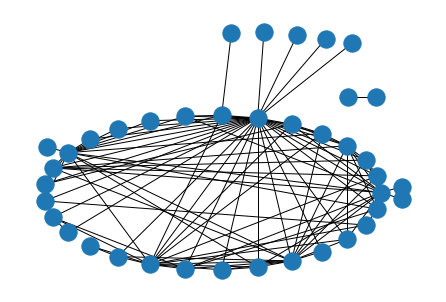

In [ ]:
#pos = nx.spring_layout(graph, scale = 0.5) #-> X
# pos = nx.spiral_layout(graph)
# pos = nx.random_layout(graph)
# pos=nx.kamada_kawai_layout(graph)
pos = nx.nx_pydot.pydot_layout(graph, prog='circo', root=None)
# pos = nx.planar_layout(graph)
# pos=nx.nx_agraph.graphviz_layout(graph, prog = "fdp")  #, Goverlap="scale"

nx.draw(graph, pos)  #,pos

In [ ]:
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')
    


NODE_WEIGHT_THRESHOLD = 10

edge_trace = []
for edge in graph.edges():

    if graph.edges()[edge]['weight'] > EDGE_WEIGHT_THRESHOLD:
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos[char_1]
        x1, y1 = pos[char_2]
        text   = char_1 + '--' + char_2 + ': ' + str(graph.edges()[edge]['weight'])
        width = ( graph.edges()[edge]['weight'] - MIN_EDGE_WEIGHT) / EDGES_FOO
        if width < 0.01:
          width = 0.1
        width = width * 5
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                              width = width)  #graph.edges()[edge]['weight']**1.75
        edge_trace.append(trace)

# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 20,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the nodetrace
cont = 0
fenom = 0

for node in graph.nodes():
    if graph.nodes()[node]['weight'] < NODE_WEIGHT_THRESHOLD:
      continue
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    ciao = ( graph.nodes()[node]['weight'] - MIN_NODE_WEIGHT) / NODES_FOO
    if ciao < 0.01:
      cont += 1
      ciao = 0.01
    else:
      fenom += 1
    ciao = int(ciao * 100)

    node_trace['marker']['size'] += tuple([ciao]) #= 10 #+= tuple([5*graph.nodes()[node]['weight']])
    node_trace['text'] += tuple(['<b style="color: black;">' + node + '</b>'])

print(cont, fenom)
# Customize layout
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    height = 1000,
)
# Create figure
fig = go.Figure(layout = layout)
# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
# Add node trace
fig.add_trace(node_trace)
# Remove legend
fig.update_layout(showlegend = False)
# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)
# Show figure
fig.show()

2 37


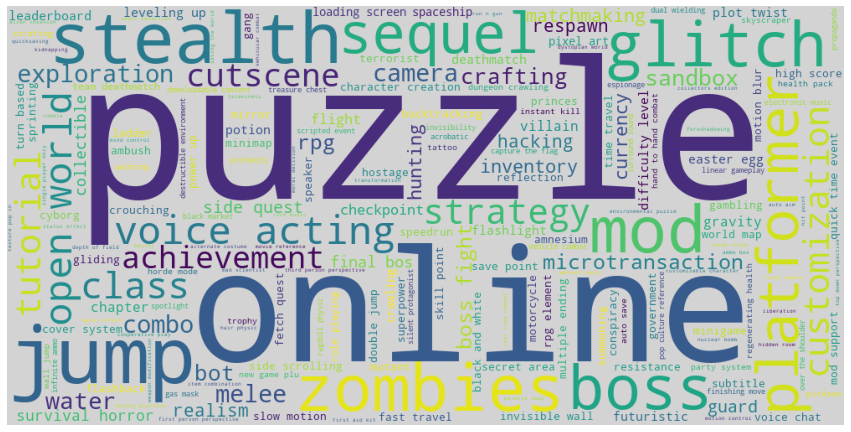

In [ ]:
#convert list to string and generate
unique_string=(" ").join(flat_list)
wordcloud = WordCloud(width = 1000, height = 500, normalize_plurals=False, background_color="lightgrey").generate_from_frequencies(singles_counter)#generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordmap"+".png", bbox_inches='tight')
plt.show()
plt.close()